# Daily / Monthly sales Trend Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("sales_backup_2.csv")
print(df.to_string())

   OrderID CustomerName        City     Product     Category  Quantity  Price  Discount  TotalAmount  DiscountAmount  NetAmount
0     1001        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0
1     1002         Riya     Pokhara       Phone  Electronics         2  30000       5.0        60000          3000.0    57000.0
2     1003        Suman   Kathmandu  Headphones  Electronics         1   2000       0.0         2000             0.0     2000.0
3     1004        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0
4     1005        Kiran  Biratnagar       Chair    Furniture         3   5000       0.0        15000             0.0    15000.0
5     1006          NaN     Pokhara       Table    Furniture         1  15000       5.0        15000           750.0    14250.0
6     1007        Meena    Lalitpur       Phone  Electronics         1  30000      50.0        30000    

In [34]:
import numpy as np
df["Date"] = pd.to_datetime("2024-01-01") + pd.to_timedelta(np.random.randint(0, 365, size=len(df)), unit="D")




In [35]:
df.head()

,OrderID,CustomerName,City,Product,Category,Quantity,Price,Discount,TotalAmount,DiscountAmount,NetAmount,Date,Month
0,1001,Anish,Kathmandu,Laptop,Electronics,1,80000,10.0,80000,8000.0,72000.0,2024-04-04,1
1,1002,Riya,Pokhara,Phone,Electronics,2,30000,5.0,60000,3000.0,57000.0,2024-01-02,1
2,1003,Suman,Kathmandu,Headphones,Electronics,1,2000,0.0,2000,0.0,2000.0,2024-07-30,1
3,1004,Anish,Kathmandu,Laptop,Electronics,1,80000,10.0,80000,8000.0,72000.0,2024-06-28,1
4,1005,Kiran,Biratnagar,Chair,Furniture,3,5000,0.0,15000,0.0,15000.0,2024-10-20,1


In [ ]:
#Converting the date column 
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

OrderID                    int64
CustomerName              object
City                      object
Product                   object
Category                  object
Quantity                   int64
Price                      int64
Discount                 float64
TotalAmount                int64
DiscountAmount           float64
NetAmount                float64
Date              datetime64[ns]
dtype: object

Text(0, 0.5, 'NetAmount')

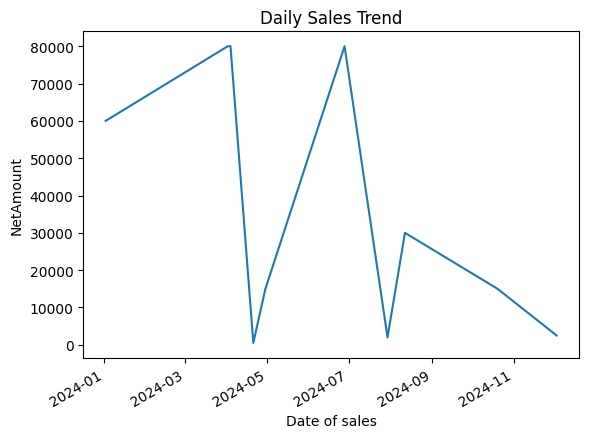

In [36]:
#Group by date 
#Line chart (Trend Chart)
daily_sales = df.groupby("Date")["TotalAmount"].sum()
daily_sales.plot(kind="line")
plt.title("Daily Sales Trend")
plt.xlabel("Date of sales")
plt.ylabel("NetAmount")


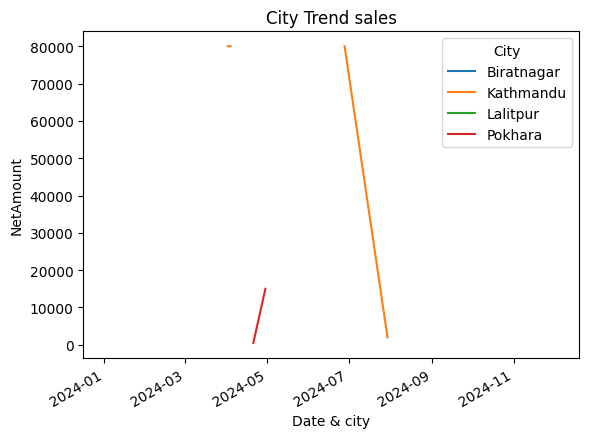

In [37]:
city_trend = df.groupby(["Date","City"])["TotalAmount"].sum().unstack()

city_trend.plot()
plt.title("City Trend sales")
plt.xlabel("Date & city")
plt.ylabel("NetAmount")
plt.show()


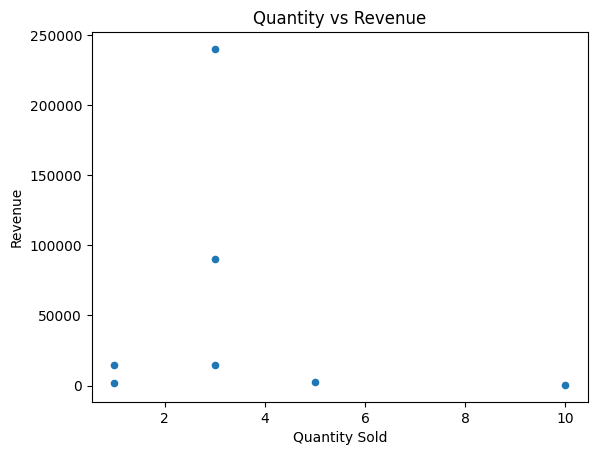

In [39]:
product_summary = df.groupby("Product").agg({
          "Quantity":"sum",
          "TotalAmount":"sum"
})
#scatter plot 
product_summary.plot(kind="scatter",x="Quantity",y="TotalAmount")
plt.title("Quantity vs Revenue")
plt.xlabel("Quantity Sold")
plt.ylabel("Revenue")
plt.show()

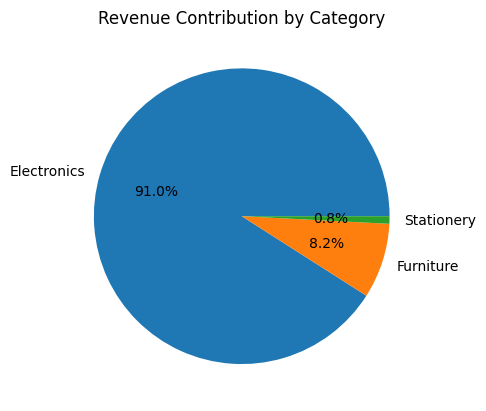

In [40]:
#Category Contribution 
category_sales =df.groupby("Category")["TotalAmount"].sum()
category_sales.plot(kind="pie",autopct="%1.1f%%")

plt.title("Revenue Contribution by Category")
plt.ylabel("")
plt.show()


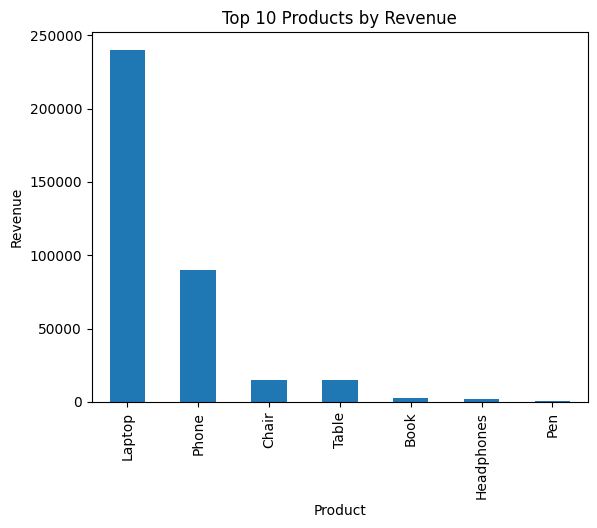

In [41]:
top_products = df.groupby("Product")["TotalAmount"].sum().sort_values(ascending=False)

top_products.plot(kind="bar")

plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()


# Monthly

In [42]:
df["Month"] = df["Date"].dt.month

In [43]:
print(df.to_string())

   OrderID CustomerName        City     Product     Category  Quantity  Price  Discount  TotalAmount  DiscountAmount  NetAmount       Date  Month
0     1001        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0 2024-04-04      4
1     1002         Riya     Pokhara       Phone  Electronics         2  30000       5.0        60000          3000.0    57000.0 2024-01-02      1
2     1003        Suman   Kathmandu  Headphones  Electronics         1   2000       0.0         2000             0.0     2000.0 2024-07-30      7
3     1004        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0 2024-06-28      6
4     1005        Kiran  Biratnagar       Chair    Furniture         3   5000       0.0        15000             0.0    15000.0 2024-10-20     10
5     1006          NaN     Pokhara       Table    Furniture         1  15000       5.0        15000           750.0    1425

In [45]:
monthly_sales = df.groupby("Month")["TotalAmount"].sum()
monthly_sales


Month
1      60000
4     175500
6      80000
7       2000
8      30000
10     15000
12      2500
Name: TotalAmount, dtype: int64

Text(0, 0.5, 'NetAmount')

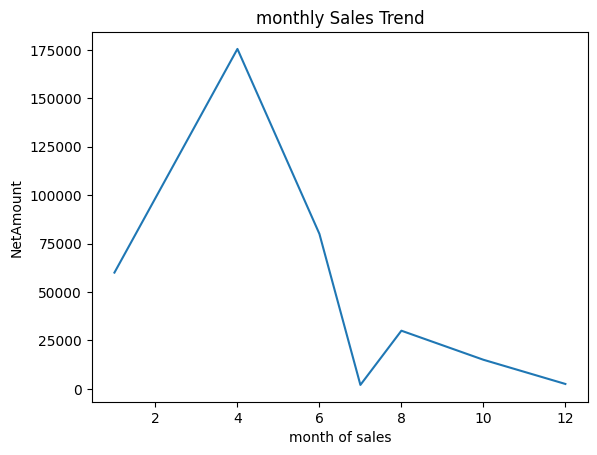

In [46]:
monthly_sales_sales = df.groupby("Month")["TotalAmount"].sum()
monthly_sales_sales.plot(kind="line")
plt.title("monthly Sales Trend")
plt.xlabel("month of sales")
plt.ylabel("NetAmount")


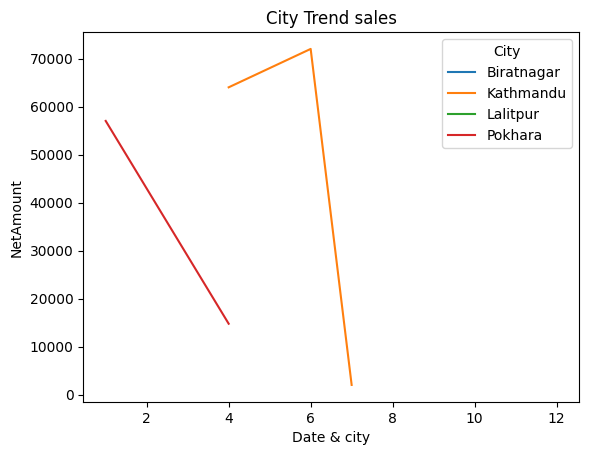

In [50]:
monthly_trend = df.groupby(["Month","City"])["NetAmount"].sum().unstack()

monthly_trend.plot()
plt.title("City Trend sales")
plt.xlabel("Date & city")
plt.ylabel("NetAmount")
plt.show()

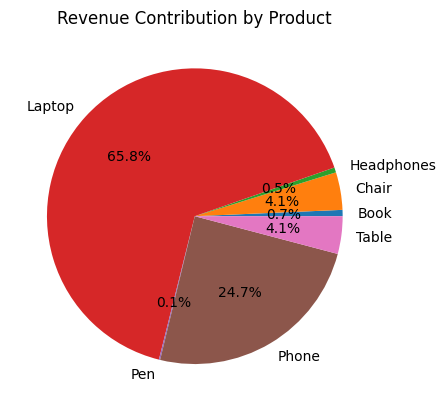

In [51]:
category_sales =df.groupby("Product")["TotalAmount"].sum()
category_sales.plot(kind="pie",autopct="%1.1f%%")

plt.title("Revenue Contribution by Product")
plt.ylabel("")
plt.show()

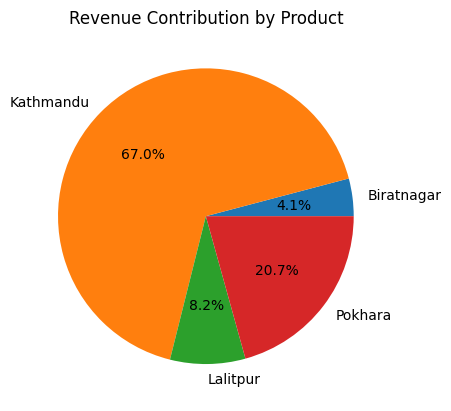

In [52]:
category_sales =df.groupby("City")["TotalAmount"].sum()
category_sales.plot(kind="pie",autopct="%1.1f%%")

plt.title("Revenue Contribution by Product")
plt.ylabel("")
plt.show()

In [53]:
df.to_csv("sales_backup_3.csv", index=False)